# 第1题 支持向量机SVM

在$\mathcal{X}=(x_1,x_2)^T$空间中给定正样本如下：$X_1=(0,0)^T,X_2=(1,0)^T,X_3=(0,-1)^T$，负样本如下：$X_4=(-1,0)^T,X_5=(-1,-1)^T,X_6=(2,1)^T$。

In [1]:
import sympy
from utils import get_z_data, draw_z_points, draw_z_classifier, get_classifier, draw_x_classifier
from data import POS_DATA, NEG_DATA

%matplotlib inline

## (1)

首先对$\mathcal{X}$空间中的样本做如下变换到$\mathcal{Z}$空间，$Z=(\phi_1(X),\phi_2(X))^T$，其中$\phi_1(X)=-3x_1^2+7x_1+1,\phi_2(X)=-2x_2^2+2x_1+1$，画出变换后在$\mathcal{Z}$空间内到样本点；

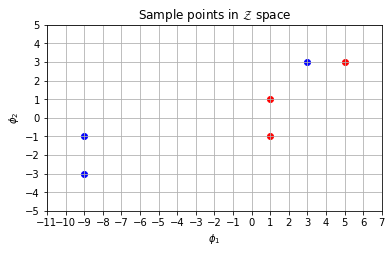

In [2]:
z_pos = get_z_data(POS_DATA)
z_neg = get_z_data(NEG_DATA)

draw_z_points(z_pos, z_neg)

## (2)

根据(1)中的变换结果，利用支持向量机算法进行分类，指出$\mathcal{Z}$空间中哪些样本是支持向量，并写出$\mathcal{Z}$空间中的最大间隔分界面$y=w^TZ+b$；

如上图所示，很明显支持向量为：
- 负样本：$(-9,-3), (3,3)$
- 正样本：$(1,1), (5,3)$

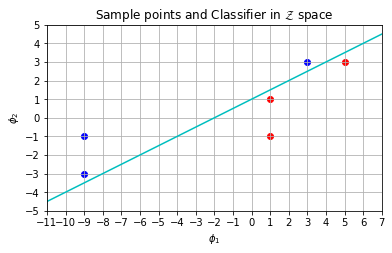

In [3]:
data_1 = sympy.Matrix([[-9], [-3]])
data_2 = sympy.Matrix([[3], [3]])
data_3 = sympy.Matrix([[1], [1]])
y_1 = -1
y_2 = -1
y_3 = 1

result = get_classifier([data_1, data_2, data_3], [y_1, y_2, y_3])
[w1_z, w2_z, b_z] = result.args[0]

draw_z_classifier(z_pos, z_neg, w1_z, b_z, w2_z)

In [4]:
x1, x2, y1, y2 = sympy.symbols('x1 x2 y1 y2')
y2 = -(w1_z*y1 + b_z) / w2_z
y2

y1/2 + 1

所以可以得到：最大间隔分隔面为$\phi_2 = \frac{\phi_1}{2}+1$

## (3)

根据(2)的结果，写出$\mathcal{X}$空间内的分类界面。

由于$y_2=\frac{y_1}{2}+1$，即$2y_2 = y_1 + 2$，根据变换公式可以得到：

$2(-2x_2^2+2x_1+1)=-3x_1^2+7x_1+1+2$

$4x_2^2=3x_1^2-3x_1-1$

可以把图画出来（如下图）。

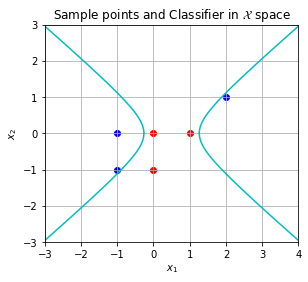

In [5]:
draw_x_classifier(POS_DATA, NEG_DATA)

# 第2题 深度神经网络BP算法

考虑训练过程中某时刻具有如下参数的多层感知机结构，隐藏层使用Sigmoid激活函数，输出层考虑与one-hot标签向量的L2距离的平方作为损失，使用随机梯度下降法更新参数，每批只有一个样本。下次迭代时使用的样本是{$x_0=0.6, x_1=0.1, y=dog$}。

In [6]:
from model import MLP, MLPTorch
from utils import train_mlp, train_mlp_torch

## (1)

计算前向传播过程，给出每个神经元（包括隐藏层和输出层）的损失函数的计算结果；

In [7]:
mlp = MLP()
train_mlp(mlp)
print('隐藏层激活前:\n{}'.format(mlp.z1))
print('隐藏层的输出（激活后）:\n{}'.format(mlp.a1))
print('输出层的输出:\n{}'.format(mlp.a2))
print('损失:\n{}'.format(mlp.curr_loss))

隐藏层激活前:
[[0.8 ]
 [0.22]
 [1.3 ]]
隐藏层的输出（激活后）:
[[0.68997448]
 [0.55477924]
 [0.78583498]]
输出层的输出:
[[2.53903406]
 [2.72056318]]
损失:
4.885044935543278


## (2)

以0.1为学习率完成参数更新，并给出更新后的参数。

In [8]:
print('更新前的参数')
print('w1\n{}\nw2\n{}'.format(mlp.w1_init, mlp.w2_init))
print('-'*10)
print('更新后的参数')
print('w1\n{}\nw2\n{}'.format(mlp.w1, mlp.w2))

更新前的参数
w1
[[1.  2. ]
 [0.3 0.4]
 [2.  1. ]]
w2
[[1.  0.5 2. ]
 [2.  1.  1. ]]
----------
更新后的参数
w1
[[0.91041256 1.98506876]
 [0.24827717 0.39137953]
 [1.94144599 0.990241  ]]
w2
[[0.89381058 0.41461759 1.87905732]
 [1.81228808 0.8490688  0.78620863]]


In [9]:
# 用pytorch的全连接层实现，验证自己的代码是否正确
mlp_torch = MLPTorch()
print('更新前的参数')
print('w1\n{}\nw2\n{}'.format(mlp_torch.fc1.weight,mlp_torch.fc2.weight))
print('-'*10)
train_mlp_torch(mlp_torch)
print('更新后的参数')
print('w1\n{}\nw2\n{}'.format(mlp_torch.fc1.weight,mlp_torch.fc2.weight))

更新前的参数
w1
Parameter containing:
tensor([[1.0000, 2.0000],
        [0.3000, 0.4000],
        [2.0000, 1.0000]], requires_grad=True)
w2
Parameter containing:
tensor([[1.0000, 0.5000, 2.0000],
        [2.0000, 1.0000, 1.0000]], requires_grad=True)
----------
更新后的参数
w1
Parameter containing:
tensor([[0.9104, 1.9851],
        [0.2483, 0.3914],
        [1.9414, 0.9902]], requires_grad=True)
w2
Parameter containing:
tensor([[0.8938, 0.4146, 1.8791],
        [1.8123, 0.8491, 0.7862]], requires_grad=True)
